The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


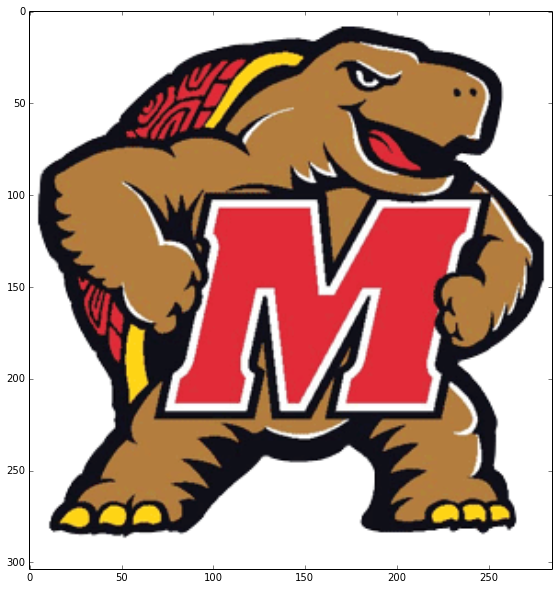

time: 608 ms


In [128]:
%matplotlib inline
%load_ext autotime
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
import os
from connect_image import *

img = cv2.imread('images/terapinLogo.png', 1)
# img = cv2.resize(img, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_CUBIC)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_rgb)

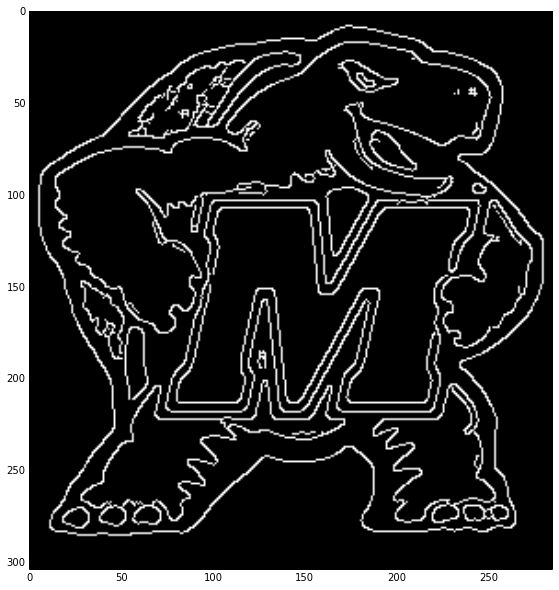

time: 379 ms


In [130]:
edges = extract_edges(img, 5, 100, 200)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(edges, cmap='gray')  

32
19


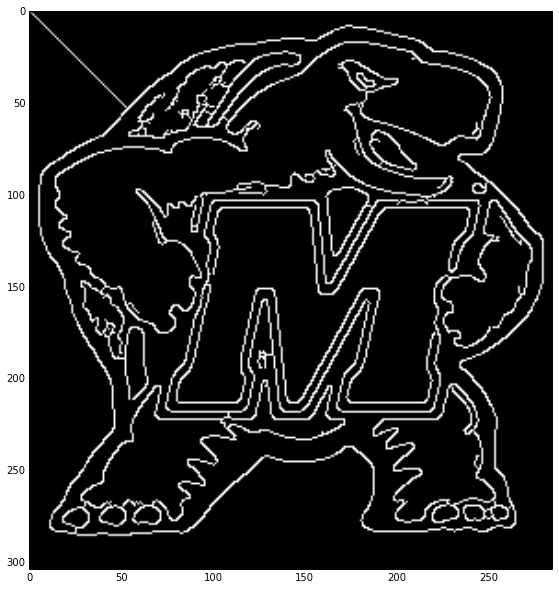

time: 3.16 s


In [131]:
connected_edges = np.copy(edges)
components = find_components(connected_edges)
filtered_components = []
min_component_size = 15
for component in components:
    if len(component) >= min_component_size:
        filtered_components.append(component)
    else:
        x = np.array(list(component))
        connected_edges[x[:,0],x[:,1]] = False
print len(components)
components = filtered_components
print len(components)
# A = connect2(connected_edges, components)
# A = np.array(A)
# approx_img = np.zeros_like(connected_edges).astype('uint8')
# A = np.array(list(components[16]))
# approx_img[A[:,0],A[:,1]] = True
connected_edges[0,0] = True
components = [set([(0,0)])] + components
connect(connected_edges, components)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(connected_edges, cmap='gray')  

In [4]:
len(A)


NameError: name 'A' is not defined

time: 43.2 ms


In [ ]:
# 28,227
x, y  = local_search(connected_edges, [(28, 227)], set([(28, 227)]), set(), 30)
print len(x), len(y)

In [ ]:
y

Reduced points from 10699 to 1001


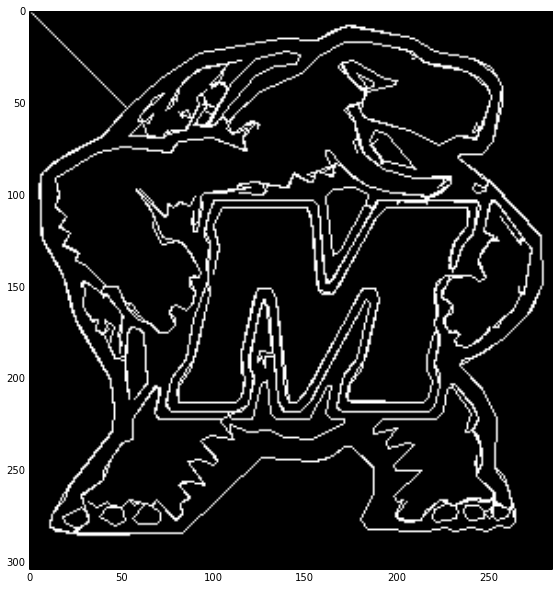

time: 1.34 s


In [132]:
(i, j) = np.argwhere(connected_edges)[0]

path, costs, paths = nn_tsp(connected_edges, (i, j))
path = np.array(path)
# path = np.fliplr(path)
# B, vid2 = improve_path(connected_edges, approx, path, graph, vid)
# approx = graph2path(graph, [(k, l) for (k, l) in path[:2]], vid)

# path = graph2path(connected_edges, graph, tuple(path[0]), vid, paths)
# path = np.array(path)
# approx = np.squeeze(cv2.approxPolyDP(path, 0.9, False))
# approx_img = np.zeros_like(connected_edges).astype('uint8')

# approx2 = improve_path2(connected_edges, path, costs, paths)
approx1 = simplify_path(path, 1.5)
approx1 = np.fliplr(approx1)
approx_img = np.zeros_like(connected_edges).astype('uint8')
cv2.drawContours(approx_img, [approx1], -1, 255, 1)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(approx_img, cmap='gray') 
print 'Reduced points from %s to %s' % (path.shape[0], approx1.shape[0])


In [ ]:
path.tolist().index([28, 27])



In [ ]:
improve_path(connected_edges, graph, vid, paths)
# path = graph2path(connected_edges, graph, tuple(path[0]), vid, paths)
# path = np.array(path)

# approx_img = np.zeros_like(connected_edges).astype('uint8')
# cv2.drawContours(approx_img, [path], -1, 255, 1)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(approx_img, cmap='gray') 
print 'Reduced points to %s' % (path.shape[0])

In [ ]:
approx[354], approx[355]

In [133]:
import pickle
m, n = connected_edges.shape
with open('/home/michael/src/etch_a_sketch/demo_pts/testudo.pts', 'w') as f:
    pickle.dump((approx1, m, n), f)

time: 13.1 ms


In [89]:
approx1[870:]


array([[465, 320],
       [456, 315],
       [454, 315],
       [450, 313],
       [445, 313],
       [444, 312],
       [437, 312],
       [436, 313],
       [431, 313],
       [430, 314],
       [427, 314],
       [426, 315],
       [422, 315],
       [421, 316],
       [418, 316],
       [417, 317],
       [413, 317],
       [409, 319],
       [404, 319],
       [400, 321],
       [396, 321],
       [395, 322],
       [392, 322],
       [391, 323],
       [387, 323],
       [386, 324],
       [383, 324],
       [382, 325],
       [379, 325],
       [378, 326],
       [375, 326],
       [374, 327],
       [370, 327],
       [369, 328],
       [366, 328],
       [365, 329],
       [362, 329],
       [361, 330],
       [357, 330],
       [356, 331],
       [353, 331],
       [352, 332],
       [348, 332],
       [344, 334],
       [339, 334],
       [335, 336],
       [331, 336],
       [330, 337],
       [327, 337],
       [326, 338],
       [322, 338],
       [321, 339],
       [318,

time: 19 ms


In [ ]:
c = 0
for i in range(413):
    for j in range(413):
        c += 1

In [ ]:
approx

In [ ]:
len(costs)

In [ ]:
path[:28]

In [ ]:
costs

In [ ]:
approx[:30]

In [ ]:
new_costs

In [ ]:
approx.shape

In [ ]:
approx2.shape

In [ ]:
approx1.shape


In [ ]:
approx2.shape

In [ ]:
np.version.version


In [ ]:
costs[4450:-3]
